C:\Users\benja\AppData\Local\Temp\ipykernel_18168\2879614247.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('cool', 5)  # 5 discrete colors


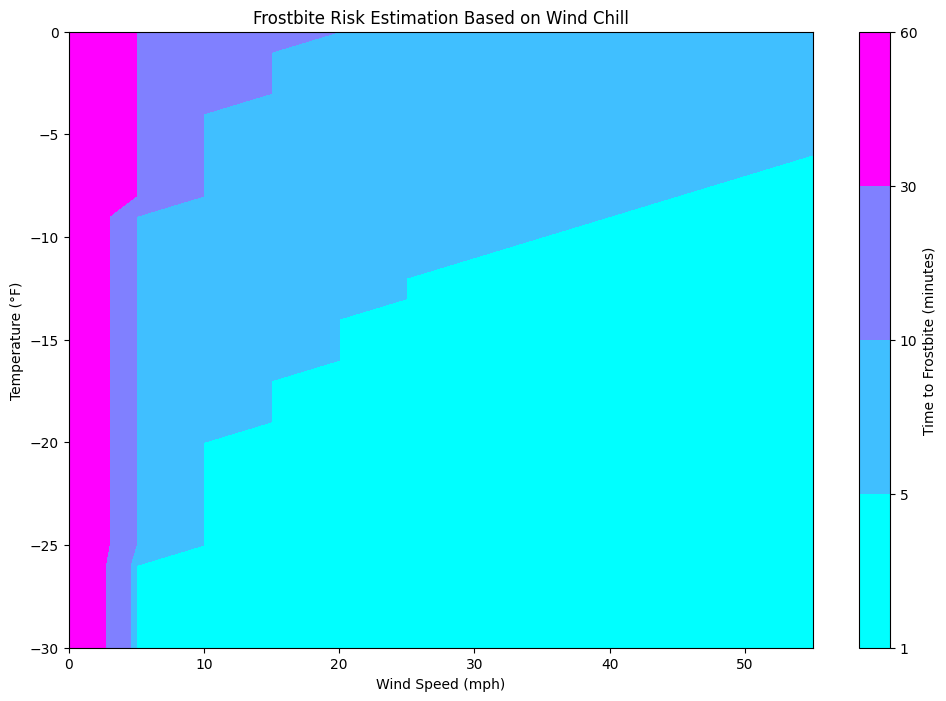

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Frostbite time estimation function based on wind chill
def frostbite_time(wind_chill):
    if wind_chill >= -1:
        return 60  # No immediate risk of frostbite, setting a high time
    elif -1 > wind_chill >= -20:
        return 30  # 30 minutes to frostbite
    elif -20 > wind_chill >= -40:
        return 10  # 10 minutes to frostbite
    elif -40 > wind_chill >= -60:
        return 5   # 5 minutes to frostbite
    else:
        return 1   # 1 minute to frostbite

# Wind chill calculation function (using the simplified formula)
def wind_chill(temperature, wind_speed):
    return 35.74 + 0.6215 * temperature - 35.75 * wind_speed**0.16 + 0.4275 * temperature * wind_speed**0.16

# Temperature and wind speed ranges
temperatures = np.arange(-30, 1, 1)  # Temperatures from -30 to 0 degrees Fahrenheit
wind_speeds = np.arange(0, 60, 5)    # Wind speeds from 0 to 55 mph

# Initialize a matrix to store frostbite times
frostbite_matrix = np.zeros((len(temperatures), len(wind_speeds)))

# Calculate frostbite times for each combination of temperature and wind speed
for i, temp in enumerate(temperatures):
    for j, wind in enumerate(wind_speeds):
        chill = wind_chill(temp, wind)
        frostbite_matrix[i, j] = frostbite_time(chill)

# Visualization
plt.figure(figsize=(12, 8))
# Define a custom colormap to handle the high frostbite time value
cmap = plt.cm.get_cmap('cool', 5)  # 5 discrete colors
bounds = [1, 5, 10, 30, 60]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

plt.contourf(wind_speeds, temperatures, frostbite_matrix, levels=bounds, cmap=cmap, norm=norm)
plt.colorbar(label='Time to Frostbite (minutes)')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Temperature (°F)')
plt.title('Frostbite Risk Estimation Based on Wind Chill')
plt.show()
